<div align="left">
<img align="left" src="../misc/cinlogo.jpg" height="60" width="60" >
<div> <b> UNET </b> </div>
<div> Pedro D. Marrero Fernandez</div>
<div> :), :(, :/</div>
</div>     

In [11]:
import os
import sys
import numpy as np
import pandas as pd
import csv

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from skimage import io, transform
from skimage import color
import scipy.misc
import scipy.ndimage as ndi

from pytvision import visualization as view

sys.path.append('../')
from torchlib.datasets import imageutl as imutl
from torchlib import utils

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

# Load dataset

In [8]:
pathdataset     = '~/.datasets'
namedataset     = 'cambia'
folders_images  = 'images'
folders_labels  = 'labels'
sub_folder      =  ''

pathname = os.path.join(os.path.expanduser( pathdataset ), namedataset);
dataloader = imutl.cambiaProvide.create(
    pathname, 
    sub_folder, 
    folders_images, 
    folders_labels,
    )

print(len(dataloader))
print(':)!!!')

13
:)!!!


## Random Visualization

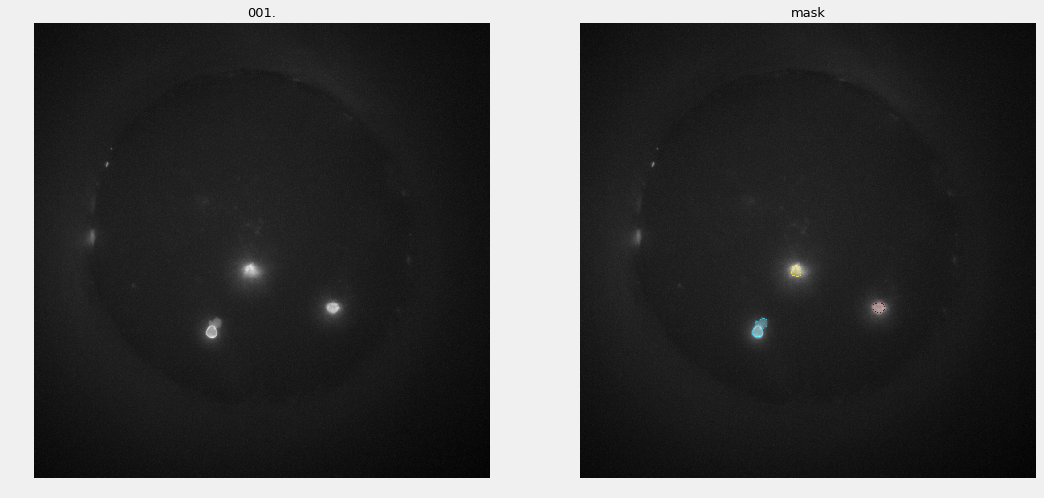

In [19]:

image, label = dataloader[ np.random.randint( len(dataloader) ) ]
label = utils.decompose( utils.tolabel(label) ).transpose( (1,2,0) )
label = label[:,:, np.random.permutation(label.shape[2]) ]
label = view.makeimagecell(image, label, alphaback=0.2, alphaedge=0.9)

plt.figure( figsize=(16,8) )
plt.subplot(121)
plt.imshow( image, cmap='gray' )
plt.axis('off')
plt.title( dataloader.getid()[:-4] )
plt.subplot(122)
plt.imshow( label )
plt.axis('off')
plt.title( 'mask' )
plt.show()



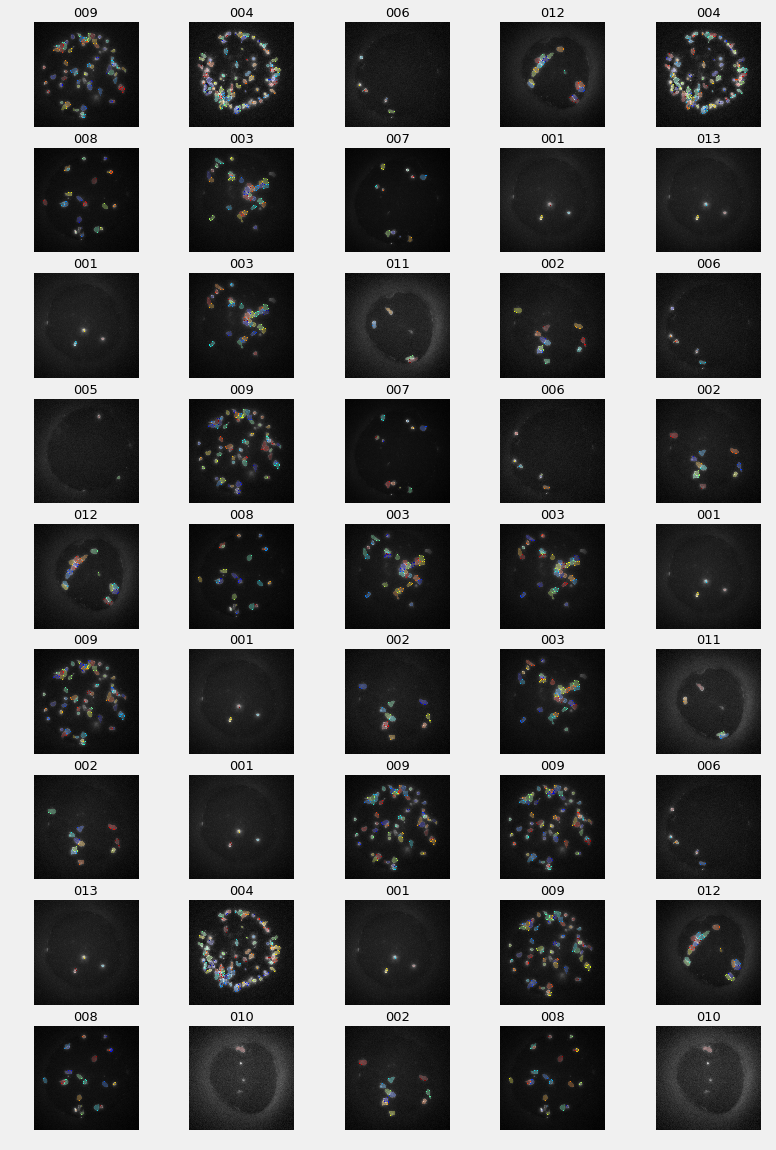

In [20]:
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (12,19)

numRows = 9; numCols = 5

plt.figure()
for k in range(numRows*numCols):
    image, label = dataloader[ np.random.randint( len(dataloader) ) ]
    label = utils.decompose( utils.tolabel(label) ).transpose( (1,2,0) )
    label = label[:,:, np.random.permutation(label.shape[2]) ]
    label = view.makeimagecell(image, label, alphaback=0.2, alphaedge=0.9)      
    plt.subplot(numRows,numCols,k+1); 
    plt.imshow( label )
    plt.title( dataloader.getid()[:-4] ); 
    plt.axis('off')
    

### Tool annotation 

- https://en.wikipedia.org/wiki/List_of_manual_image_annotation_tools
- https://github.com/labelbox/Labelbox/  ****
- https://github.com/wkentaro/labelme
